# **[Steel Industry Energy Consumption](https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption)**
### *<font color='blue'>Energy Usage prediction</font>

 in this project we want to train a model to predict the <font color='green'>Energy Usage</font> of Steel Industry Based on its Dataset.

# Data Preparation

outlier

In [149]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [64]:
df = pd.read_csv('data/train.csv')
# df = pd.read_csv('Steel_industry_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    27999 non-null  int64  
 1   date                                  27999 non-null  object 
 2   Lagging_Current_Reactive.Power_kVarh  27999 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  27880 non-null  float64
 4   CO2(tCO2)                             27999 non-null  float64
 5   Lagging_Current_Power_Factor          27999 non-null  float64
 6   Leading_Current_Power_Factor          27923 non-null  float64
 7   NSM                                   27999 non-null  int64  
 8   WeekStatus                            26225 non-null  object 
 9   Day_of_week                           26225 non-null  object 
 10  Load_Type                             27999 non-null  object 
 11  Usage_kWh      

In [65]:
null_count = df.isnull().sum()
print(null_count)

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


## Cleaning Data

In [66]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['Leading_Current_Reactive_Power_kVarh', 'Leading_Current_Power_Factor','WeekStatus','Day_of_week'])
print(df_copy.isnull().sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [61]:
print(df_copy.head())
print(df_copy.info())
print(df_copy.describe())


   Id           date  Lagging_Current_Reactive.Power_kVarh  \
0   1  1/1/2018 0:15                                  2.95   
1   2  1/1/2018 0:30                                  4.46   
2   3  1/1/2018 0:45                                  3.28   
3   4  1/1/2018 1:00                                  3.56   
4   5  1/1/2018 1:15                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                 

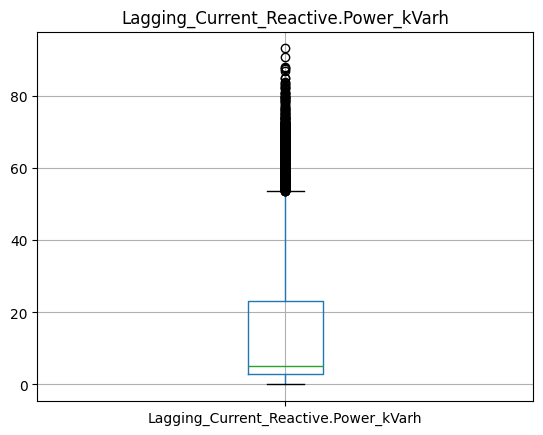

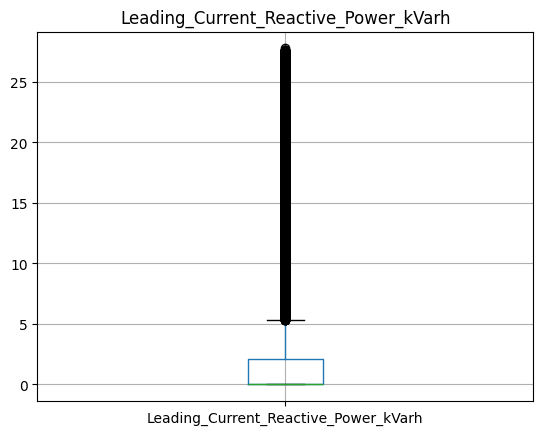

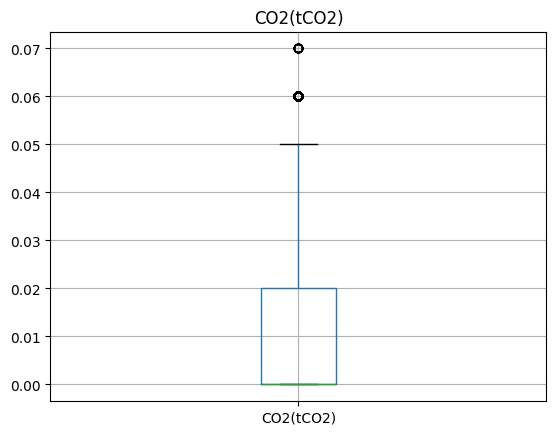

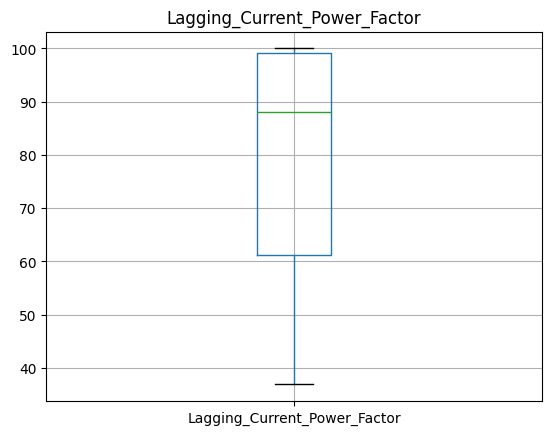

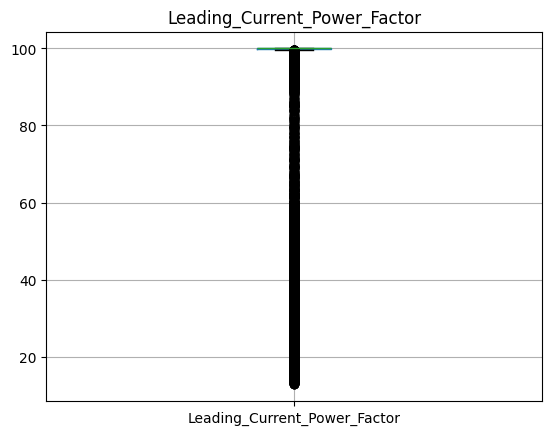

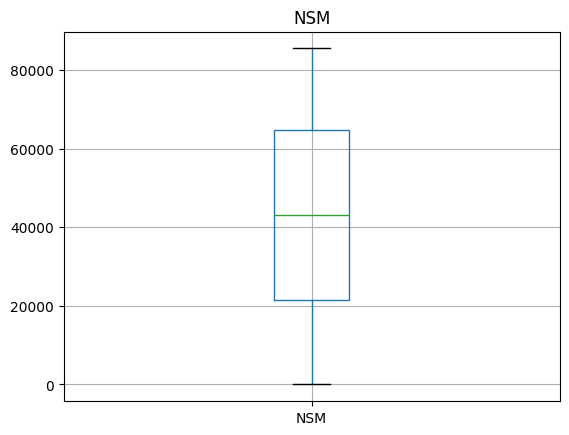

In [7]:
# List of columns for which you want to plot a boxplot
columns = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
           'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor',
           'NSM']

for column in columns:
    plt.figure()  # Create a new figure
    df_copy.boxplot([column])  # Create a boxplot for the column
    plt.title(column)  # Set the title of the plot as the column name
    plt.show()


In [8]:
# Initialize empty dictionaries to hold the Q1, Q3, IQR, lower_limit, and upper_limit values for each column
Q1 = {}
Q3 = {}
IQR = {}
lower_limit = {}
upper_limit = {}

# Loop through each column in the DataFrame
for column in columns:
    # Calculate Q1, Q3, and IQR
    Q1[column] = df_copy[column].quantile(0.25)
    Q3[column] = df_copy[column].quantile(0.75)
    IQR[column] = Q3[column] - Q1[column]

    # Calculate the lower and upper limits
    lower_limit[column] = Q1[column] - 1.5 * IQR[column]
    upper_limit[column] = Q3[column] + 1.5 * IQR[column]

# Convert the dictionaries to DataFrames for easier viewing
Q1 = pd.DataFrame.from_dict(Q1, orient='index', columns=['Q1'])
Q3 = pd.DataFrame.from_dict(Q3, orient='index', columns=['Q3'])
IQR = pd.DataFrame.from_dict(IQR, orient='index', columns=['IQR'])
lower_limit = pd.DataFrame.from_dict(lower_limit, orient='index', columns=['Lower Limit'])
upper_limit = pd.DataFrame.from_dict(upper_limit, orient='index', columns=['Upper Limit'])

# Display the results
print(Q1)
print(Q3)
print(IQR)
print(lower_limit)
print(upper_limit)


                                              Q1
Lagging_Current_Reactive.Power_kVarh      2.7400
Leading_Current_Reactive_Power_kVarh      0.0000
CO2(tCO2)                                 0.0000
Lagging_Current_Power_Factor             61.2325
Leading_Current_Power_Factor             99.8125
NSM                                   21600.0000
                                              Q3
Lagging_Current_Reactive.Power_kVarh     23.1400
Leading_Current_Reactive_Power_kVarh      2.1200
CO2(tCO2)                                 0.0200
Lagging_Current_Power_Factor             99.0775
Leading_Current_Power_Factor            100.0000
NSM                                   64800.0000
                                             IQR
Lagging_Current_Reactive.Power_kVarh     20.4000
Leading_Current_Reactive_Power_kVarh      2.1200
CO2(tCO2)                                 0.0200
Lagging_Current_Power_Factor             37.8450
Leading_Current_Power_Factor              0.1875
NSM                 

In [9]:
for column in columns:
    # Define a condition for values that are not outliers
    non_outlier_condition = (df_copy[column] >= lower_limit['Lower Limit'][column]) & (df_copy[column] <= upper_limit['Upper Limit'][column])

    # Calculate the mean of the non-outlier values in the column
    mean = df_copy.loc[non_outlier_condition, column].mean()

    # Define a condition for values that are outliers
    outlier_condition = (df_copy[column] < lower_limit['Lower Limit'][column]) | (df_copy[column] > upper_limit['Upper Limit'][column])

    # Replace outliers with the mean
    df_copy.loc[outlier_condition, column] = mean


C:\Users\tbtw0\AppData\Local\Temp\ipykernel_4624\1531919895.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '42801.62120630042' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[outlier_condition, column] = mean


In [10]:
# Initialize an empty dictionary to hold the count of outliers for each column
outliers = {}

for column in columns:
    # Define a condition for values that are below the lower limit or above the upper limit
    condition = (df_copy[column] < lower_limit['Lower Limit'][column]) | (df_copy[column] > upper_limit['Upper Limit'][column])

    # Use numpy's 'where' function to get the indices of the outliers
    outlier_indices = np.where(condition)[0]

    # Count the number of outliers
    outliers[column] = len(outlier_indices)

# Convert the dictionary to a DataFrame for easier viewing
outliers = pd.DataFrame.from_dict(outliers, orient='index', columns=['Number of Outliers'])

# Display the results
print(outliers)



                                      Number of Outliers
Lagging_Current_Reactive.Power_kVarh                   0
Leading_Current_Reactive_Power_kVarh                   0
CO2(tCO2)                                              0
Lagging_Current_Power_Factor                           0
Leading_Current_Power_Factor                           0
NSM                                                    0


 **Standardizing**

In [67]:
from sklearn.preprocessing import StandardScaler
# Assume df_copy is your DataFrame
numerical_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()

# Remove the Id, date, and target column
numerical_cols = [col for col in numerical_cols if col not in ['Id', 'date', 'Usage_kWh']]

scaler = StandardScaler()

df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

df_copy.to_csv('normalized_data.csv', index=False)

Transforming

In [68]:
#transforming

# le=LabelEncoder()
# label=le.fit_transform(df_copy['WeekStatus'])
# df_copy.drop("WeekStatus",axis=1,inplace=True)
# df_copy["WeekStatus"]=label

df_copy = df_copy.drop(['WeekStatus','Day_of_week'], axis=1)
df_copy
#transform with label encoder
#weekday->0  weekend->1

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,-0.631619,-0.515718,-0.727099,-0.339417,0.508518,-1.681947,Light_Load,3.17
1,2,1/1/2018 0:30,-0.539796,-0.515718,-0.727099,-0.668189,0.508518,-1.645821,Light_Load,4.00
2,3,1/1/2018 0:45,-0.611552,-0.515718,-0.727099,-0.488998,0.508518,-1.609695,Light_Load,3.24
3,4,1/1/2018 1:00,-0.594525,-0.515718,-0.727099,-0.600801,0.508518,-1.573568,Light_Load,3.31
4,5,1/1/2018 1:15,-0.537364,-0.515718,-0.727099,-0.772844,0.508518,-1.537442,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,1.172608,-0.515718,0.498306,0.300768,0.508518,0.413381,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,1.345308,-0.515718,1.111008,0.250227,0.508518,0.449507,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,1.069232,-0.515718,1.111008,0.498848,0.508518,0.485634,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,2.726907,-0.515718,1.723711,0.205813,0.508518,0.521760,Maximum_Load,89.68


In [15]:
one_hot = pd.get_dummies(df_copy['Day_of_week'])
df_copy = df_copy.drop('Day_of_week',axis = 1)
df_copy = df_copy.join(one_hot)

#transform with one_hot for day_of_week

In [69]:
one_hot = pd.get_dummies(df_copy['Load_Type'])
df_copy = df_copy.drop('Load_Type',axis = 1)
df_copy = df_copy.join(one_hot)
#transform with one_hot for load_type

In [70]:
review=pd.DataFrame(df_copy)
review
review.to_csv('transformed.csv',index=False)



# Exploratory Data Analysis

In [71]:
df = pd.read_csv('transformed.csv')
# df = pd.read_csv('standared.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26030 entries, 0 to 26029
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    26030 non-null  int64  
 1   date                                  26030 non-null  object 
 2   Lagging_Current_Reactive.Power_kVarh  26030 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  26030 non-null  float64
 4   CO2(tCO2)                             26030 non-null  float64
 5   Lagging_Current_Power_Factor          26030 non-null  float64
 6   Leading_Current_Power_Factor          26030 non-null  float64
 7   NSM                                   26030 non-null  float64
 8   Usage_kWh                             26030 non-null  float64
 9   Light_Load                            26030 non-null  bool   
 10  Maximum_Load                          26030 non-null  bool   
 11  Medium_Load    

In [76]:
# Exclude 'Date' from the correlation calculation
correlations = df.drop(columns='date').corr()['Usage_kWh'].drop('Usage_kWh')

# Set a threshold for minimum correlation
threshold = 0.5

# Select features that have a correlation above the threshold
selected_features = correlations[abs(correlations) > threshold].index.tolist()

print(f"Selected features: {selected_features}")

Selected features: ['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Light_Load', 'Maximum_Load']


<ipython-input-229-c93e8665c3fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


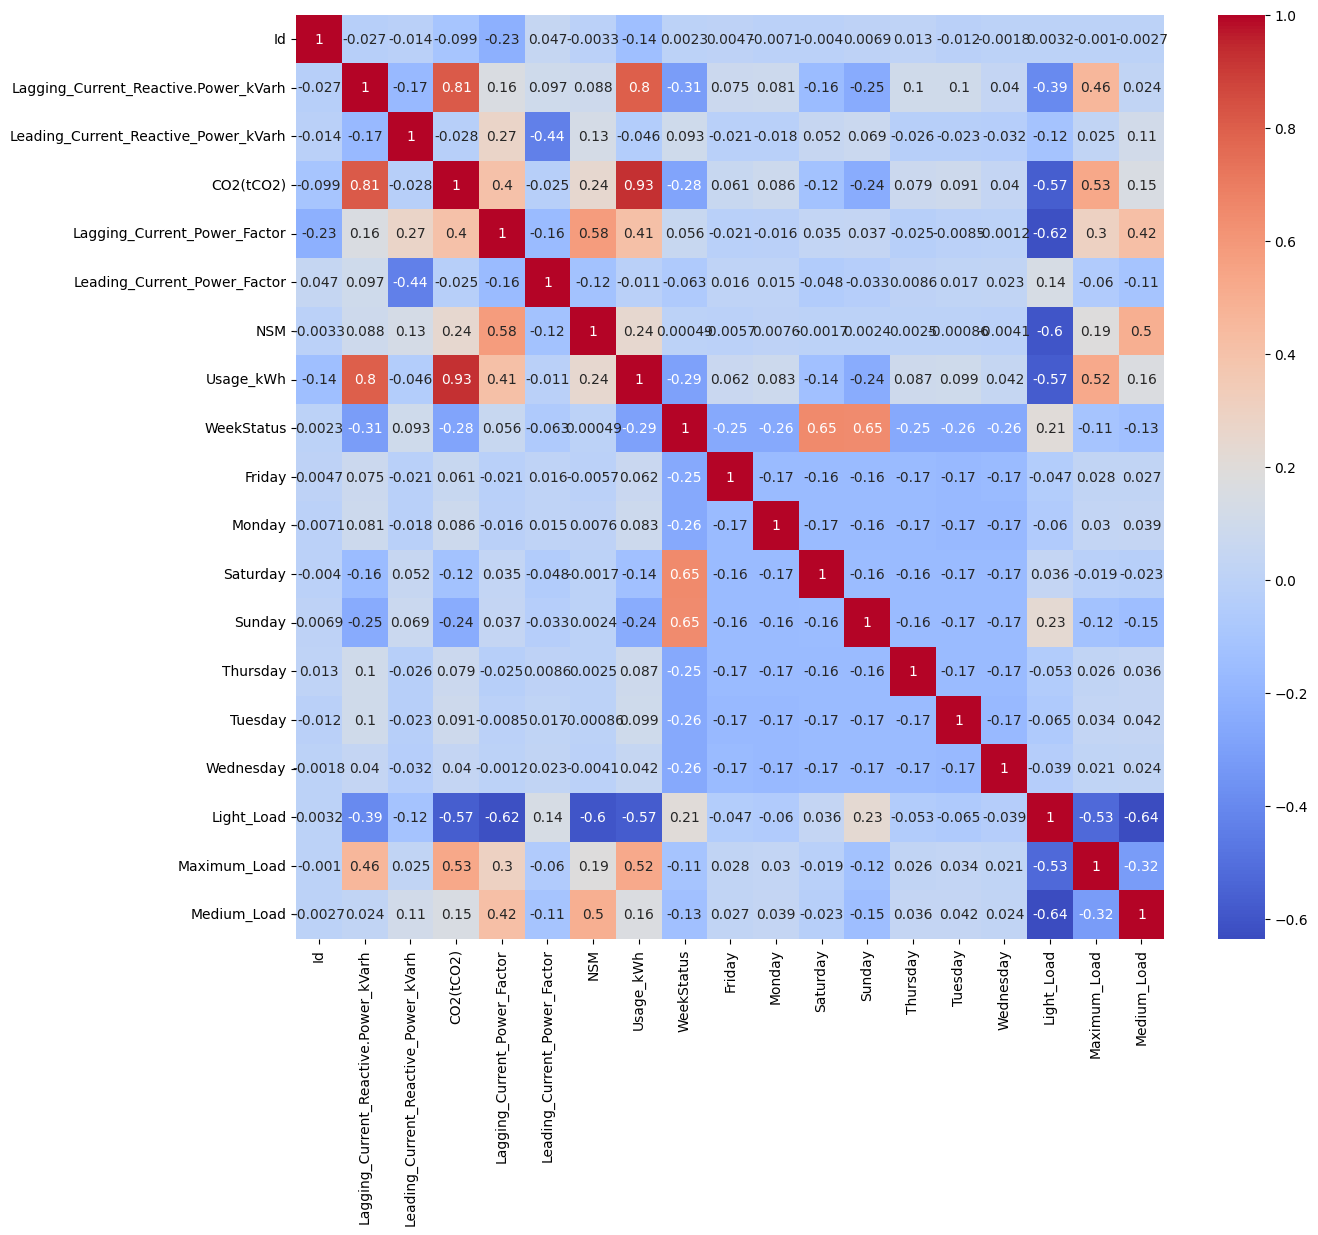

In [229]:
# Calculate the correlation matrix
correlation_matrix = df.corr()


plt.figure(figsize = (14,12))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

# Pre-Model

In [77]:
df = pd.read_csv('transformed.csv')
# df = pd.read_csv('transformed.csv')
df.head(5)

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh,Light_Load,Maximum_Load,Medium_Load
0,1,1/1/2018 0:15,-0.631619,-0.515718,-0.727099,-0.339417,0.508518,-1.681947,3.17,True,False,False
1,2,1/1/2018 0:30,-0.539796,-0.515718,-0.727099,-0.668189,0.508518,-1.645821,4.00,True,False,False
2,3,1/1/2018 0:45,-0.611552,-0.515718,-0.727099,-0.488998,0.508518,-1.609695,3.24,True,False,False
3,4,1/1/2018 1:00,-0.594525,-0.515718,-0.727099,-0.600801,0.508518,-1.573568,3.31,True,False,False
4,5,1/1/2018 1:15,-0.537364,-0.515718,-0.727099,-0.772844,0.508518,-1.537442,3.82,True,False,False


In [85]:
# indexing data
df = df.set_index('date')

In [91]:
#split data
X = df.drop(columns=['Id', 'Usage_kWh'],axis=1)
X = X.drop(columns=['Leading_Current_Reactive_Power_kVarh','Leading_Current_Power_Factor', 'NSM', 'Medium_Load'])
y = df['Usage_kWh']
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

X

(18221, 5)
(18221,)
(3904, 5)
(3904,)


,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Light_Load,Maximum_Load
date,,,,,
1/1/2018 0:15,-0.631619,-0.727099,-0.339417,True,False
1/1/2018 0:30,-0.539796,-0.727099,-0.668189,True,False
1/1/2018 0:45,-0.611552,-0.727099,-0.488998,True,False
1/1/2018 1:00,-0.594525,-0.727099,-0.600801,True,False
1/1/2018 1:15,-0.537364,-0.727099,-0.772844,True,False
...,...,...,...,...,...
19/10/2018 14:45,1.172608,0.498306,0.300768,False,True
19/10/2018 15:00,1.345308,1.111008,0.250227,False,True
19/10/2018 15:15,1.069232,1.111008,0.498848,False,True


In [92]:
y = y.astype('int')
select_reg =  SelectKBest(k=5, score_func=f_regression).fit(X, y)

In [93]:
X_Select = select_reg.transform(X)
X_Select.shape

(26030, 5)

In [94]:
Selected_features = pd.DataFrame({'columns': X.columns,'Kept': select_reg.get_support()})
Selected_features
#Leading_Current_Reactive_Power_kVarh - Leading_Current_Power_Factor potentially removed


,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,CO2(tCO2),True
2,Lagging_Current_Power_Factor,True
3,Light_Load,True
4,Maximum_Load,True


# Modeling (Linear Regression)

In [233]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train_temp, y_train_temp)
lr.score(X_test, y_test)

CPU times: user 20.3 ms, sys: 2.93 ms, total: 23.2 ms
Wall time: 22.8 ms


0.8744716337935104

In [234]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_test_pred = lr.predict(X_test)

# Calculate the test error
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Test Error (MSE): {test_error}')


Test Error (MSE): 142.08691454677893


In [235]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.9)
%time ridge.fit(X_train_temp, y_train_temp)
ridge.score(X_test, y_test)

CPU times: user 7.86 ms, sys: 6.97 ms, total: 14.8 ms
Wall time: 13.5 ms


0.8744721236421684

In [236]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_test_pred = ridge.predict(X_test)

# Calculate the test error
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Test Error for Ridge (MSE): {test_error}')

Test Error for Ridge (MSE): 142.08636008178829


In [216]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train_temp , y_train_temp)
lasso.score(X_test, y_test)

CPU times: user 16.2 ms, sys: 2.95 ms, total: 19.1 ms
Wall time: 14.3 ms


0.9795084140809998

In [217]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_test_pred = lasso.predict(X_test)

# Calculate the test error
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Test Error for Ridge (MSE): {test_error}')

Test Error for Ridge (MSE): 23.194647595520497


In [95]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_temp, y_train_temp)

SVR()

In [96]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
7/7/2018 14:15,72.07,66.752252,5.317748
11/6/2018 23:00,3.71,3.578939,0.131061
14/07/2018 16:30,84.49,79.415781,5.074219
24/01/2018 17:15,74.59,69.288074,5.301926
11/2/2018 13:00,4.14,3.199790,0.940210


In [97]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train_temp,y_train_temp),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 3.08
R squared training 0.9917
R sqaured testing 0.9916


In [154]:
from sklearn.model_selection import cross_val_score

rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_temp, y_train_temp)

best_rf_model = grid_search.best_estimator_

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf_model, X_train_temp, y_train_temp, cv=k_fold, scoring='r2')

y_rf_pred = best_rf_model.predict(X_test)
rf_model = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_rf_pred, 'Difference': y_test - y_rf_pred})
print(rf_model.head(5))

print('Random Forest Regression Model')
print('Squared mean error:', round(np.sqrt(mean_squared_error(y_test, y_rf_pred)), 2))
print('R squared training:', round(grid_search.best_score_, 4))
print('R squared testing:', round(r2_score(y_test, y_rf_pred), 4))

Stacked Model R^2 Score: 0.9990515735686649
                  Actual Value  Predicted Value  Difference
date                                                       
7/7/2018 14:15           72.07        72.185800   -0.115800
11/6/2018 23:00           3.71         3.716000   -0.006000
14/07/2018 16:30         84.49        84.250600    0.239400
24/01/2018 17:15         74.59        74.679300   -0.089300
11/2/2018 13:00           4.14         3.336934    0.803066
Random Forest Regression Model
Squared mean error: 1.04
R squared testing: 0.9991


In [162]:
testing_data = pd.read_csv('data/test.csv')
testing_data = testing_data.set_index('date')

In [163]:
testing_data = testing_data.drop(columns=['Id','Leading_Current_Reactive_Power_kVarh','Leading_Current_Power_Factor', 'NSM','WeekStatus', 'Day_of_week'], axis=1)
testing_data.shape[1]

4

In [164]:
numerical_cols_test = testing_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove the Id, date, and target column
numerical_cols_test = [col for col in numerical_cols_test if col not in ['date']]

scaler_test = StandardScaler()

testing_data[numerical_cols_test] = scaler_test.fit_transform(testing_data[numerical_cols_test])


In [165]:
numerical_cols_test

['Lagging_Current_Reactive.Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor']

In [118]:
le_test=LabelEncoder()
label_test=le_test.fit_transform(testing_data['WeekStatus'])
testing_data.drop("WeekStatus",axis=1,inplace=True)
testing_data["WeekStatus"]=label_test

KeyError: 'WeekStatus'

In [179]:
one_hot_test = pd.get_dummies(testing_data['Day_of_week'])
testing_data = testing_data.drop('Day_of_week',axis = 1)
testing_data = testing_data.join(one_hot_test)


In [166]:
one_hot_test = pd.get_dummies(testing_data['Load_Type'])
testing_data = testing_data.drop('Load_Type',axis = 1)
testing_data = testing_data.join(one_hot_test)
#transform with one_hot for load_type


In [167]:
testing_data = testing_data.drop(columns='Medium_Load')
testing_data

,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Light_Load,Maximum_Load
date,,,,,
19/10/2018 16:00,3.293564,2.588771,0.064562,False,True
19/10/2018 16:15,2.685094,1.933952,0.130005,False,True
19/10/2018 16:30,2.740176,1.933952,0.130005,False,True
19/10/2018 16:45,1.546293,1.279133,0.060959,False,True
19/10/2018 17:00,1.467512,1.279133,0.117997,False,True
...,...,...,...,...,...
31/12/2018 23:00,-0.473829,-0.685323,-1.261712,True,False
31/12/2018 23:15,-0.545564,-0.685323,-0.744772,True,False
31/12/2018 23:30,-0.582073,-0.685323,-0.389938,True,False


In [168]:
y_test_pred = best_rf_model.predict(testing_data)

In [143]:
testing_data['Usage_kWh'] = y_test_pred
testing_data.to_csv('test_with_predictions.csv', index=False)